# Regression analyisis

In [44]:

#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(10,7)})

#copy the path of the sample quotes: (to big to put in the git)
#ALEX: 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'
#JULES: ...
#MARIN: ...
#NICO: ...


path_2_data = 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'


#import the dataset sample
df = pd.read_json(path_2_data + 'polUS_quotes_speakers_merged.json.bz2',compression="bz2",lines=True)

df.describe()

,p1,p2,delta_p,year,colloquial,lastrevid
count,39482.000000,39482.000000,39482.000000,39482.000000,39482.000000,3.948200e+04
mean,0.805335,0.167410,0.637925,2017.617699,0.284636,1.392228e+09
std,0.097171,0.080209,0.172354,1.813997,0.451247,8.928226e+06
min,0.501000,0.012100,0.300000,2015.000000,0.000000,1.184424e+09
25%,0.730000,0.101000,0.497800,2016.000000,0.000000,1.392576e+09
50%,0.815800,0.159600,0.652100,2018.000000,0.000000,1.393144e+09
75%,0.885600,0.228900,0.782300,2019.000000,1.000000,1.393554e+09
max,0.987900,0.350000,0.975800,2020.000000,1.000000,1.396190e+09


In [30]:
df.head(60)

,label,qid_unique,0,1,quotes_number,fraction,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,candidacy,type,religion
0,Barack Obama,Q76,1008,359,1367,0.262619,"[Barack Hussein Obama II, Barack Obama II, Bar...",[+1961-08-04T00:00:00Z],[Q30],[Q6581097],1395141963,"[Q49085, Q6935055, Q12826303, Q6392846]",O000167,"[Q82955, Q40348, Q15958642, Q28532974, Q372436]",[Q29552],"[Q1765120, Q1540185]",Q76,"[Q3586671, Q45578, Q4226, Q4791768, Q17067714,...",item,"[Q23540, Q1062789, Q960252, Q426316]"
1,Bernie Sanders,Q359442,723,268,991,0.270434,[Bernard Sanders],[+1941-09-08T00:00:00Z],[Q30],[Q6581097],1392561607,[Q7325],S000033,"[Q82955, Q1930187, Q154549, Q1622272, Q36180, ...","[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268]
2,Francis,Q450675,641,271,912,0.297149,"[Jorge Mario Bergoglio, Francisco, Pope Franci...",[+1936-12-17T00:00:00Z],"[Q237, Q414]",[Q6581097],1396054797,[Q1056744],None,"[Q63173086, Q593644, Q104050302, Q36180, Q1234...",None,[Q1233889],Q450675,None,item,[Q9592]
3,Hillary Clinton,Q6294,645,245,890,0.275281,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],[Q30],[Q6581072],1393846565,None,C001041,"[Q82955, Q40348, Q193391, Q36180, Q18814623, Q...","[Q29552, Q29468]","[Q163727, Q1540185]",Q6294,"[Q699872, Q4791768]",item,[Q33203]
4,Andrew Cuomo,Q11673,476,182,658,0.276596,[Andrew Mark Cuomo],[+1957-12-06T00:00:00Z],[Q30],[Q6581097],1393197828,[Q974693],None,"[Q40348, Q82955]",[Q29552],[Q1540185],Q11673,"[Q22023432, Q65047185]",item,[Q1841]
5,Benjamin Netanyahu,Q43723,398,163,561,0.290553,"[Binyamin Netanyahu, Bibi, Bibi Netanyahu, Ben...",[+1949-10-21T00:00:00Z],[Q801],[Q6581097],1391756559,[Q7325],None,"[Q82955, Q193391, Q372436, Q47064, Q15958642, ...",[Q187009],"[Q787674, Q950900]",Q43723,"[Q2917048, Q2480394, Q2689039]",item,[Q9268]
6,Elizabeth Warren,Q434706,378,179,557,0.321364,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",[+1949-06-22T00:00:00Z],[Q30],[Q6581072],1394365746,[Q49078],W000817,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,[Q28220813],item,[Q33203]
7,Boris Johnson,Q180589,406,141,547,0.257770,"[Boris, Alexander Boris de Pfeffel Johnson, Bo...",[+1964-06-19T00:00:00Z],"[Q30, Q145]",[Q6581097],1395092363,[Q7994501],None,"[Q1930187, Q82955, Q1607826, Q36180, Q11774202...",[Q9626],None,Q180589,"[Q30173038, Q30325756, Q428598, Q590740, Q3586...",item,[Q6423963]
8,Rodrigo Duterte,Q457786,316,230,546,0.421245,"[Rodrigo Roa Duterte, Rodrigo ""Rody"" Roa Duter...",[+1945-03-28T00:00:00Z],[Q928],[Q6581097],1348817804,[Q1290600],None,[Q82955],[Q7140531],None,Q457786,None,item,None
9,Nancy Pelosi,Q170581,388,131,519,0.252408,"[Nancy Patricia D'Alesandro Pelosi, Nancy Patr...",[+1940-03-26T00:00:00Z],[Q30],[Q6581072],1392905094,[Q974693],P000197,[Q82955],[Q29552],None,Q170581,"[Q28404971, Q28122293, Q52494157]",item,[Q1841]


[]

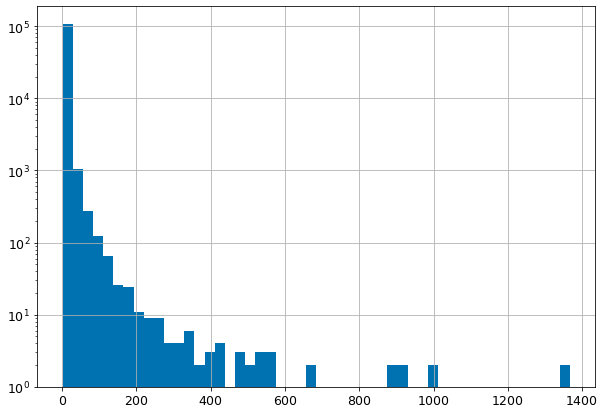

In [33]:
df.quotes_number.hist(bins=50, bottom=1)
plt.semilogy()

In [40]:
party_expanded_v1 = df["party"].apply(pd.Series)



In [ ]:
#One-Hot Encoding to represent categorical variables as binary vectors
onehot = pd.get_dummies(df['gender']).add_suffix('_onehot')
df_os=pd.merge(df,
             onehot,
             left_index=True,
             right_index=True)

#check of the operation
df21.head()

In [33]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

In [ ]:
df_nationality = df_plot.groupby('nationality')['nationality'].count() \
            .reset_index(name='count') \
            .sort_values(['count'], ascending=False)
    
df_nationality['nationality'] = df_nationality['nationality'].apply(lambda x: df_lookup.loc[x]['Label'])
ax = sns.barplot(x="nationality", y="count",data=df_nationality[:8])
ax.set(ylabel='Number of quotations')

In [32]:
#print('There are {} different party in this database'.format(len(df['party'].unique())))
#print((df['party'].unique()))

mylist = ['Q29552', 'Q29468']

df[df["nationality"].str.contains('Q30')]


KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=107413)] are in the [columns]"

In [ ]:
#the different columns of the dataframe are converted in numpy arrays:
def numpy_helper(df, cols):
    return df[cols].to_numpy()

In [ ]:
#Test the function numpy_helper:
cols = df.columns
test_helper = numpy_helper(df,cols)
assert('('+str(len(df))+', '+str(len(cols))+')'==str(test_helper.shape))

#Rapid check of the output dimensions:
print('The dataframe of dimension [{},{}] have been converted into a numpy array of dimensions [{}] '.format(len(df),len(cols),test_helper.shape))